In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

from sklearn.ensemble import RandomForestClassifier


Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와인/와인품질분류/data/sample_submission.csv')



In [ ]:
train['type'] = train['type'].map(lambda x : 0 if x == 'white' else 1)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [ ]:
train = train.append(train[train['quality'].isin([4,7,8])])
train['quality'].value_counts().sort_index()

3      26
4     372
5    1788
6    2416
7    1848
8     304
9       5
Name: quality, dtype: int64

In [ ]:
import numpy as np

def ACC(true, pred):
  score = np.mean(true == pred)
  return score

In [ ]:
def make_plot():

  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

  plt.legend()
  plt.show()


In [ ]:
features = train.columns[2:]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [ ]:
X = train[features]
y = train['quality']

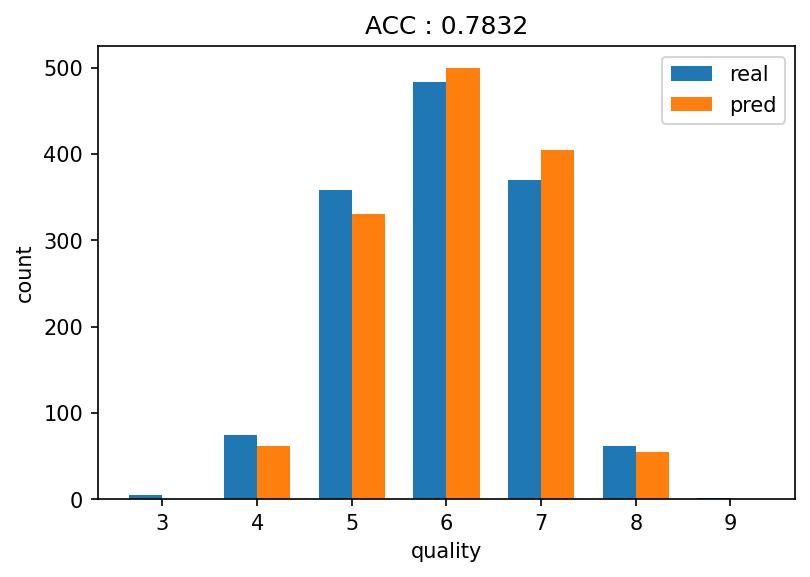

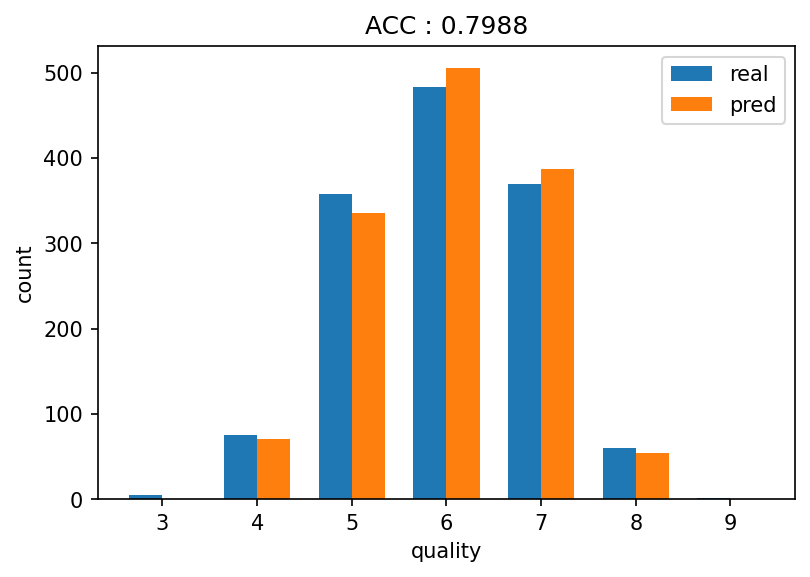

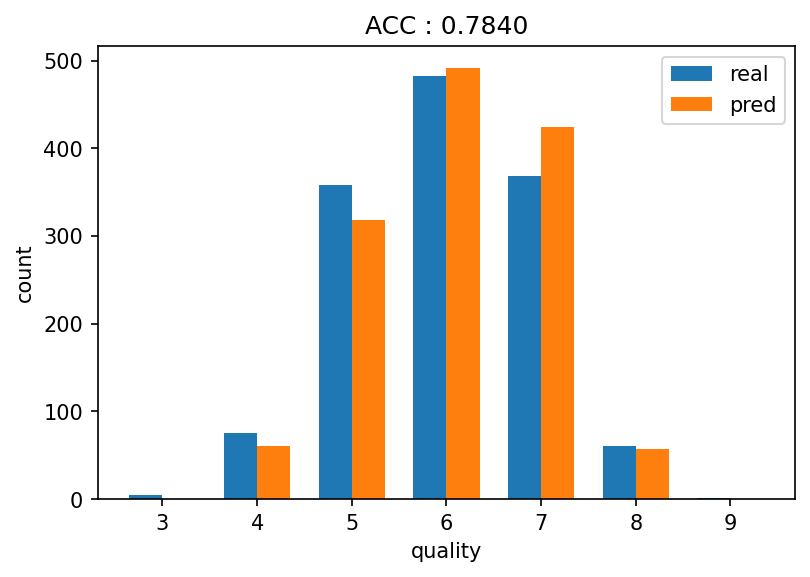

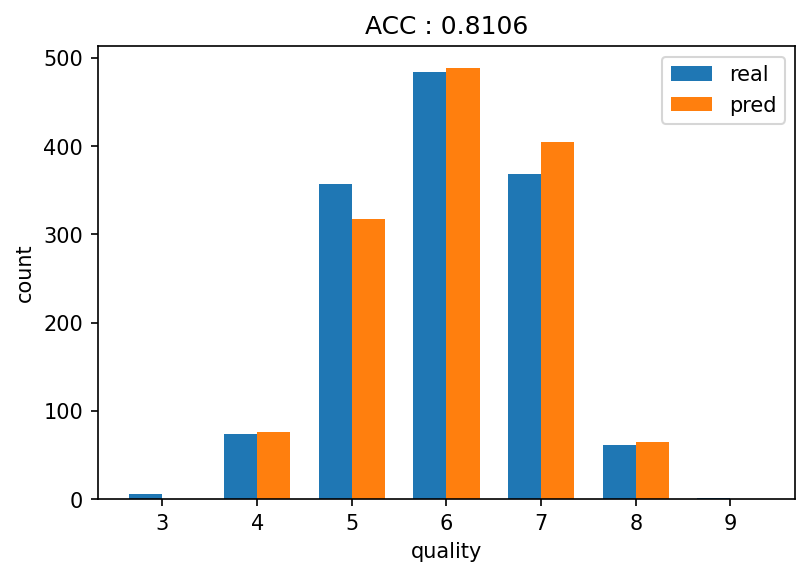

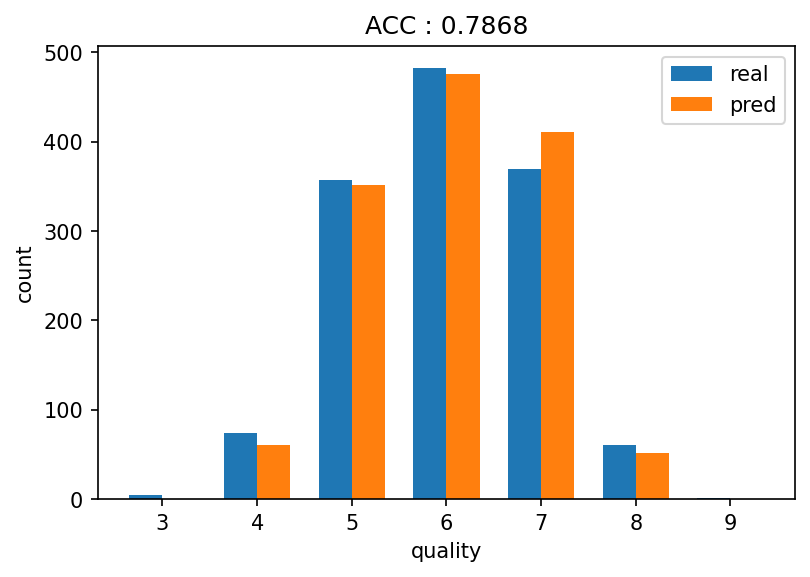

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True)

models = []
for train_idx, valid_idx in kfold.split(X,y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = RandomForestClassifier()

  model.fit(X_train, y_train)

  models.append(model)

  y_pred = model.predict(X_valid)

  make_plot()

In [ ]:
test['type'] = test['type'].map(lambda x : 0 if x == 'white' else 1)

In [ ]:
pred0 = models[0].predict(test[features])
pred1 = models[1].predict(test[features])
pred2 = models[2].predict(test[features])
pred3 = models[3].predict(test[features])
pred4 = models[4].predict(test[features])

In [ ]:
#하드 보팅
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2, 'pred3':pred3, 'pred4':pred4})
pred


,pred0,pred1,pred2,pred3,pred4
0,5,6,5,5,6
1,6,6,5,6,6
2,6,6,6,6,6
3,5,5,5,6,5
4,6,7,6,6,6
...,...,...,...,...,...
995,6,5,6,6,6
996,6,6,5,6,6
997,5,5,5,5,5
998,6,6,6,6,6


In [ ]:
pred['pred'] = pred.mode(axis=1)[0].astype(int)

submission['quality'] = pred.mode(axis=1)[0].astype(int)
submission.to_csv(submission.csv, index = False)

AttributeError: ignored

In [ ]:
#소프트보팅
pred0 = models[0].predict_proba(test[features])
pred1 = models[1].predict_proba(test[features])
pred2 = models[2].predict_proba(test[features])
pred3 = models[3].predict_proba(test[features])
pred4 = models[4].predict_proba(test[features])

In [ ]:
pred = pd.DataFrame(pred0+pred1+pred2+pred3+pred4)

In [ ]:
##1.EDA-features

train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,5481,7,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,1
5482,5482,4,6.2,0.430,0.49,6.4,0.045,12.0,115.0,0.99630,3.27,0.57,9.0,0
5485,5485,4,6.3,0.280,0.22,9.5,0.040,30.0,111.0,0.99338,3.05,0.31,10.8,0
5491,5491,7,6.9,0.340,0.30,4.7,0.029,34.0,148.0,0.99165,3.36,0.49,12.3,0


In [ ]:
def make_plots(text:str):
  plt.title(text + ' vs quality')
  
  x = train.groupby